In [1]:
#In this part of the program are the most important functions that we are going to need.
#Please run this cell before any other, in order to achieve the availability of the functions.

import numpy as np
import pandas

def read_data(filename):
    df=pandas.read_csv("./rawData/"+str(filename)) #loading the file
    t_start = np.array(df["Start"])[0].astype(float) #time of starting the experiment
    t_step = np.array(df["Increment"])[0].astype(float) #timesteps (to be multiplied with the first column)
    element=np.array(df["X"])[1:].astype(float) #simply an element of a measure sequence
    ch1=np.array(df["CH1"])[1:].astype(float) #data of ch1 in V
    ch2=np.array(df["CH2"])[1:].astype(float) #data of ch2 in V

    return ch1, ch2, t_start, t_step, element


The filenames of the files with raw data, that is going to be needed in the excercises is listed here
FET Kennlinie(4.1):
    NewFile13v.csv for 3V
    NewFile16v.csv for 6V
    NewFile10v.csv for 10V

Charakterisierung OPV(4.2):
    invertierender Verstärker:
        NewFile10kinv.csv for 10kohm, with U_E=1V
        NewFile100kinv.csv for 100kohm, with U_E=1V
        NewFile100kinv500.csv for 100kohm, 0.5V
        NewFile100kiv250.csv for 100kohm, 0.25V

    Nicht-invertierter Verstärker(Sinus):
        NewFile1ninv250.csv, with U_E=0.25
        NewFile1ninv500.csv, 0.5
        NewFile1ninv1000.csv, 0.5

    Integrierer:
        NewFile1c250s.csv sinus 0.25V
        NewFile1c500s.csv sinus 0.5V
        NewFile1c1s.csv sinus 1V
        NewFile1c75r.csv rechteck 0.075V
        NewFile1c5r.csv rechteck 0.05V
        NewFile1c1r.csv rechteck 0.1V
        

Data analysis of EX 1 FET:
plot X/Y of CH1/CH2 for 3V, 6V, 10V

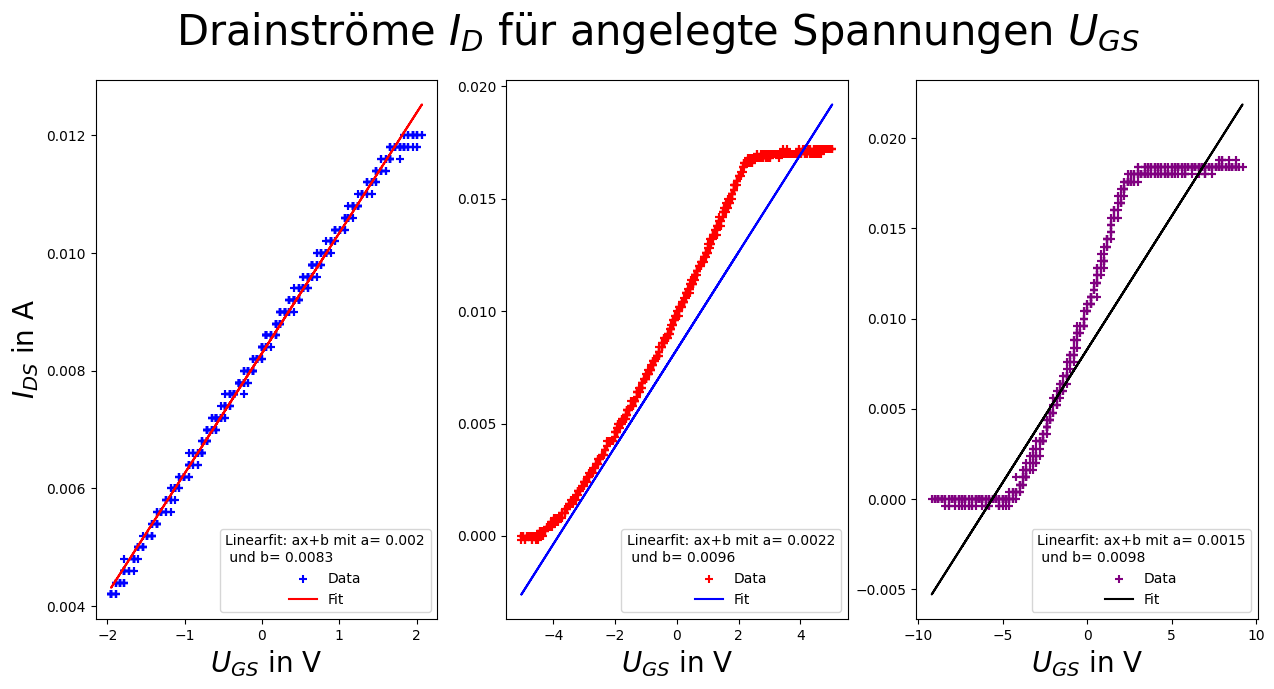

Maximum Voltage by 3V: 0.00970810810810811 +- 0.001730719649168383
Maximum Voltage by 6V: 0.016857943925233643 +- 0.0010092175455040408
Maximum Voltage by 10V: 0.018173584905660376 +- 0.0010519076231121295
-4.061699188158295 und 0.007063504049924758
-4.428583601178362 und 0.024650177509950733
-6.631024662730327 und 0.06132673732433956


In [25]:
filename1="NewFile13v.csv"
filename2="NewFile16v.csv"
filename3="NewFile10v.csv"

(ch1_1, ch2_1, t_start_1, t_step_1, element_1)=read_data(filename1)
(ch1_2, ch2_2, t_start_2, t_step_2, element_2)=read_data(filename2)
(ch1_3, ch2_3, t_start_3, t_step_3, element_3)=read_data(filename3)

import matplotlib.pyplot as plt
from scipy import stats
fig, axs=plt.subplots(1, 3, figsize=(15, 7)) #defining figure object



def myfunction(x, slope, intercept):
  return slope * x + intercept

#U_GS=+-2V
axs[0].scatter(ch1_1, ch2_1/100, color="blue", marker="+", label="Data") #division with R=100 because we want the current
axs[0].set_ylabel(r"$I_{DS}$ in A", fontsize=20)
axs[0].set_xlabel(r"$U_{GS}$ in V", fontsize=20)
#fit if necessary _____________________________________________
slope1, intercept1, r1, p1, std_err1= stats.linregress(ch1_1, ch2_1/100)
mymodel = list(map(myfunction, ch1_1, slope1*np.ones(len(ch1_1)), intercept1*np.ones(len(ch1_1))))
axs[0].plot(ch1_1, mymodel, color="red", label="Fit")
zero1=-intercept1/slope1
intercept_stderr1=0
zero1Uncert=np.sqrt((intercept_stderr1/slope1)**2 + (std_err1*intercept1/slope1**2)**2)
axs[0].legend(title="Linearfit: ax+b mit a= " + str(slope1.round(4)) + "\n und b= " + str(intercept1.round(4)), loc="lower right")
#fit if necessary _____________________________________________

#U_GS=+-5V
axs[1].scatter(ch1_2, ch2_2/100, color="red", marker="+", label="Data") #division with R=100 because we want the current
#axs[1].set_ylabel(r"$I_{DS}$ in A")
axs[1].set_xlabel(r"$U_{GS}$ in V", fontsize=20)
#fit if necessary _____________________________________________
slope2, intercept2, r2, p2, std_err2 = stats.linregress(ch1_2, ch2_2/100)
mymodel = list(map(myfunction, ch1_2, slope2*np.ones(len(ch1_2)), intercept1*np.ones(len(ch1_2)))) #[450:750]
axs[1].plot(ch1_2, mymodel, color="blue", label="Fit")
zero2=-intercept2/slope2
intercept_stderr2=0
zero2Uncert=np.sqrt((intercept_stderr2/slope2)**2 + (std_err2*intercept2/slope2**2)**2)
axs[1].legend(title="Linearfit: ax+b mit a= " + str(slope2.round(4)) + "\n und b= " + str(intercept2.round(4)), loc="lower right")
#fit if necessary _____________________________________________


#U_GS=+-9V
axs[2].scatter(ch1_3, ch2_3/100, color="purple", marker="+", label="Data") #division with R=100 because we want the current
#axs[2].set_ylabel(r"$I_{DS}$ in A")
axs[2].set_xlabel(r"$U_{GS}$ in V", fontsize=20)

#fit if necessary _____________________________________________
slope3, intercept3, r3, p3, std_err3 = stats.linregress(ch1_3, ch2_3/100)
mymodel = list(map(myfunction, ch1_3, slope3*np.ones(len(ch1_3)), intercept1*np.ones(len(ch1_3)))) #[550:650]
axs[2].plot(ch1_3, mymodel, color="black", label="Fit")
zero3=-intercept3/slope3
intercept_stderr3=0
zero3Uncert=np.sqrt((intercept_stderr3/slope3)**2 + (std_err3*intercept3/slope3**2)**2)
axs[2].legend(title="Linearfit: ax+b mit a= " + str(slope3.round(4)) + "\n und b= " + str(intercept3.round(4)), loc="lower right")
#fit if necessary _____________________________________________

fig.suptitle(r"Drainströme $I_D$ für angelegte Spannungen $U_{GS}$", fontsize=30)

plt.show()

#Calculating the maximal current with standard deviation as uncertainty
index=np.array(np.where(ch2_1==ch2_1.max()))
index1=index[0, 0]
volt1max=(ch2_1[index1:]).mean()
volt1maxUncert=np.std(ch2_1[index1:])

index=np.array(np.where(ch2_2==ch2_2.max())) #there seems to be a rush fall of the values that has'nt been plotted
index21=index[0, 0]
index=np.array(np.where(ch2_2[index21:]<0.85*ch2_2.max()))
index22=index21+index[0, 0]
volt2max=(ch2_2[index21:index22]).mean()
volt2maxUncert=np.std(ch2_2[index21:index22])

index=np.array(np.where(ch2_3==ch2_3.max()))
index31=index[0, 0]
index=np.array(np.where(ch2_3[index31:]<0.85*ch2_3.max()))
index32=index31+index[0, 0]
volt3max=(ch2_3[index31:index32]).mean()
volt3maxUncert=np.std(ch2_3[index31:index32])

current1max=volt1max/100
current1maxUncert=np.sqrt((volt1maxUncert/100)**2+(volt1max*5/100**2)**2) # 5 Ohm uncertainty for Resistance
current2max=volt2max/100
current2maxUncert=np.sqrt((volt2maxUncert/100)**2+(volt2max*5/100**2)**2)
current3max=volt3max/100
current3maxUncert=np.sqrt((volt3maxUncert/100)**2+(volt3max*5/100**2)**2)

print("Maximum Voltage by 3V: " + str(current1max) + " +- " + str(current1maxUncert))
print("Maximum Voltage by 6V: " + str(current2max) + " +- " + str(current2maxUncert))
print("Maximum Voltage by 10V: " + str(current3max) + " +- " + str(current3maxUncert))
print(str(zero1) + " und " + str(zero1Uncert))
print(str(zero2) + " und " + str(zero2Uncert))
print(str(zero3) + " und " + str(zero3Uncert))


Data analysis of EX 2 OPV:  
find increase value A from data and compare with theory

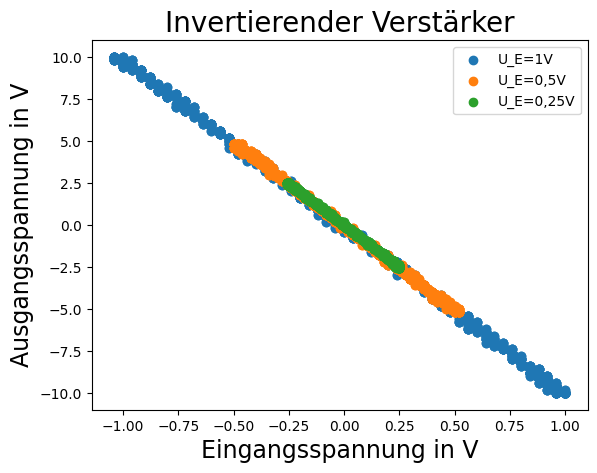

Reinforcement Factor: -9.832625623330529 +- 1.8280958715661524


In [6]:
#THIS PART IS BEEING DONE BY KEMAL MAN BUT ANDRIJA DID EVERYTHING
#INVERTIERENDER VERSTÄRKER
#Messungsnummer(look in Laborbuch) as index

#Sinus Form with U_E=1V, 10*R_1=R_2=100
import matplotlib.pyplot as plt
import numpy as np
plt.xlabel("Eingangsspannung in V", fontsize=17)
plt.ylabel("Ausgangsspannung in V", fontsize=17)
plt.title("Invertierender Verstärker", fontsize=20)
(ch1, ch2, t_start, t_step, element)=read_data("NewFile100kinv.csv")
#temporary variable, calculates the Reinforcement factor, taken care of divide by zero
reinffactor1=np.divide(ch2, ch1, out=np.zeros_like(ch2), where=ch1!=0)
plt.scatter(ch1, ch2, label=r"U_E=1V")


#Sinus Form with U_E=0.5V, 10*R_1=R_2=100
(ch1, ch2, t_start, t_step, element)=read_data("NewFile100kinv500.csv")
#temporary variable, calculates the Reinforcement factor, taken care of divide by zero
reinffactor2=np.divide(ch2, ch1, out=np.zeros_like(ch2), where=ch1!=0)
plt.scatter(ch1, ch2, label=r"U_E=0,5V")

#Sinus Form with U_E=0.25V, 10*R_1=R_2=100
(ch1, ch2, t_start, t_step, element)=read_data("NewFile100kiv250.csv")
#temporary variable, calculates the Reinforcement factor, taken care of divide by zero
reinffactor3=np.divide(ch2, ch1, out=np.zeros_like(ch2), where=ch1!=0)
plt.scatter(ch1, ch2, label=r"U_E=0,25V")

plt.legend()
plt.show()

FinalFactor=np.concatenate((reinffactor1, reinffactor2, reinffactor3), axis=None)
print("Reinforcement Factor: " + str(FinalFactor.mean()) + " +- " + str(np.std(FinalFactor))) #negative reinforcement factor

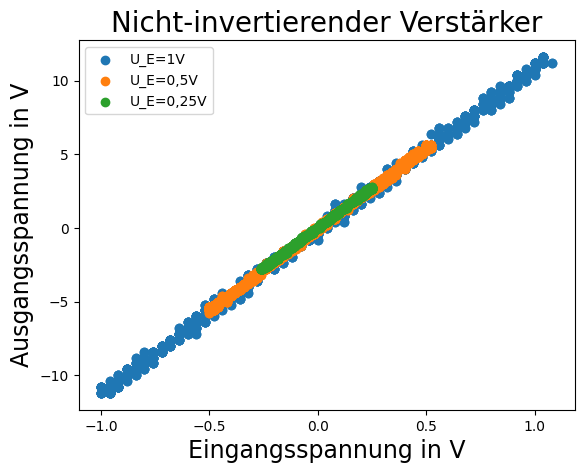

Reinforcement Factor: 10.893999006117419 +- 1.9642308172008145


In [7]:
#NICHT-INVERTIERENDER VERSTAERKER
import matplotlib.pyplot as plt
import numpy as np

#Sinus Form with U_E=0.25V, 10*R_1=R_2=100
(ch1, ch2, t_start, t_step, element)=read_data("NewFile1ninv1000.csv")
#temporary variable, calculates the Reinforcement factor, taken care of divide by zero
reinffactor3=np.divide(ch2, ch1, out=np.zeros_like(ch2), where=ch1!=0)
plt.scatter(ch1, ch2, label=r"U_E=1V")


#Sinus Form with U_E=0.5V, 10*R_1=R_2=100
(ch1, ch2, t_start, t_step, element)=read_data("NewFile1ninv500.csv")
#temporary variable, calculates the Reinforcement factor, taken care of divide by zero
reinffactor2=np.divide(ch2, ch1, out=np.zeros_like(ch2), where=ch1!=0)
plt.scatter(ch1, ch2, label=r"U_E=0,5V")


#Sinus Form with U_E=0.25V, 10*R_1=R_2=100
(ch1, ch2, t_start, t_step, element)=read_data("NewFile1ninv250.csv")
#temporary variable, calculates the Reinforcement factor, taken care of divide by zero
reinffactor1=np.divide(ch2, ch1, out=np.zeros_like(ch2), where=ch1!=0)
plt.scatter(ch1, ch2, label=r"U_E=0,25V")
plt.xlabel("Eingangsspannung in V", fontsize=17)
plt.ylabel("Ausgangsspannung in V", fontsize=17)
plt.title("Nicht-invertierender Verstärker", fontsize=20)
plt.legend()
plt.show()
FinalFactor=np.concatenate((reinffactor1, reinffactor2, reinffactor3), axis=None)
print("Reinforcement Factor: " + str(abs(FinalFactor.mean())) + " +- " + str(np.std(FinalFactor)))

Data analysis of EX 3 low-pass:  
find cutoff frequency and plot fit for the low pass  
12 datapoints for 20Hz, 50Hz, 100Hz, 200Hz, ... file names 'NewFile1(frequency)hz.csv'

[    20     50    100    200    500   1000   2000   5000  10000  20000
  50000 100000]
[0.98076923 0.96153846 0.96153846 0.90384615 0.65384615 0.42307692
 0.22307692 0.09038462 0.04615385 0.02538462 0.01153846 0.00777778]
[-0.01  -0.025 -0.032 -0.124 -0.265 -0.352 -0.38  -0.51  -0.424 -0.456
 -0.515 -0.52 ]


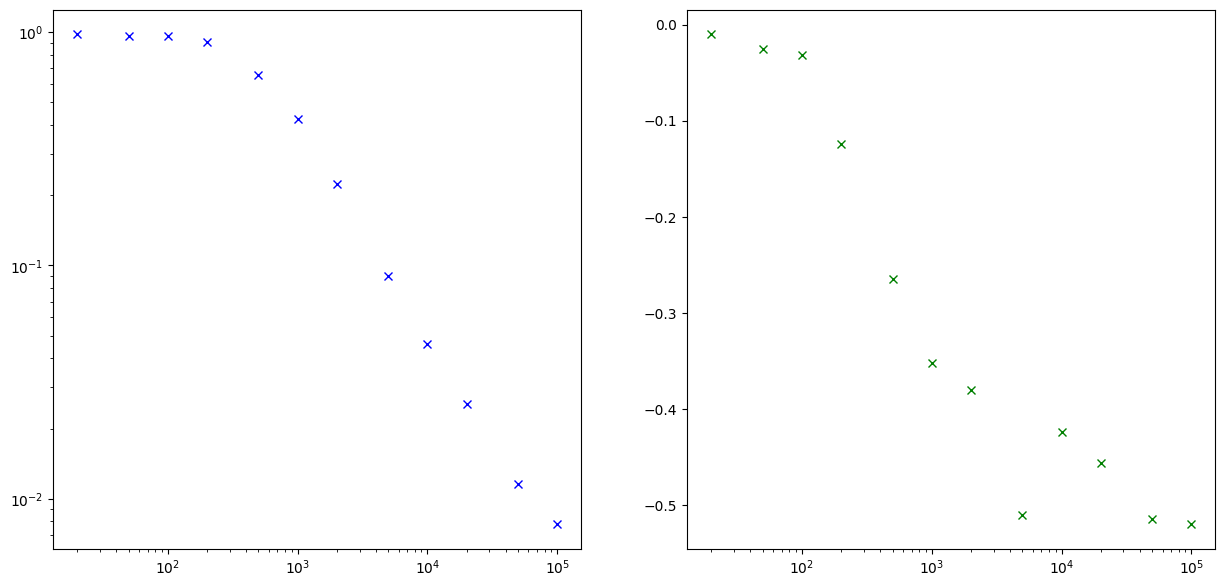

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

#function to find the difference in amplitude and phase of a wave current from before and after the low-pass
def ampandphasediff(frequency):
    #read data
    filename = 'NewFile1' + str(frequency) + 'hz.csv'
    (ch1, ch2, t_start, t_step, element) = read_data(filename)

    #calculate correct time array
    t = element

    #invert ch2, since OPV inverts signal
    ch2 =  (-1)* ch2

    #find amplitude difference between ch1 and ch2
    ch1_max = ch1.max()
    ch2_max = ch2.max()
    a = 10 # amplification factor
    ampdiff = 1 - (ch1_max - abs(ch2_max)/a)/ch1_max #decrease in amplitude normalised to 1

    #find phase difference between ch1 and ch2
    peaks1 = find_peaks(ch1, width = 130)
    peaks2 = find_peaks(ch2, width = 130)

    peak1 = peaks1[0][0]
    peak2 = peaks2[0][0]
    

    tdiff = (peak1 - peak2) * t_step
    phasediff = (2 * np.pi * tdiff * frequency)/ np.pi #phasediff with norm to steps of pi

    # amp and phase error missing

    return ampdiff, phasediff

#array of used frequencies
f = np.array([20,50,100,200,500,1000,2000,5000,10000,20000,50000,100000])
x1 = np.ones(12) 
x2 = np.ones(12)
for i in range(0,12):
    x1[i], x2[i]= ampandphasediff(f[i])
print(f)
print(x1)
print(x2)


fig, axs=plt.subplots(1, 2, figsize=(15, 7)) #defining figure object
axs[0].plot(f, x1, 'bx')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[1].plot(f, x2, 'gx')
axs[1].set_xscale('log')

plt.show()

[ 289  299  691  697  702 1090 1100]
[391 780 791]


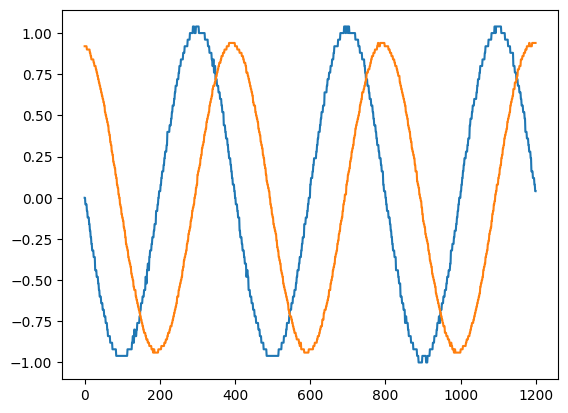

In [227]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

(ch1, ch2, t_start, t_step, element) = read_data('NewFile15000hz.csv')

ch2 = -ch2
peaks1 = find_peaks(ch1, width = 130)
print(peaks1[0])
peaks2 = find_peaks(ch2, width = 130)
print(peaks2[0])
plt.plot(element, ch1)
plt.plot(element, ch2)